# Problem Statement

Predict the percentage of marks of an student based on the number of study hours

# Importing all libraries

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
%matplotlib inline

# Reading Data

In [2]:
url = "http://bit.ly/w-data"
stud_data = pd.read_csv(url)
print("Data is imported successfully")

stud_data

Data is imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
stud_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Plotting the distribution

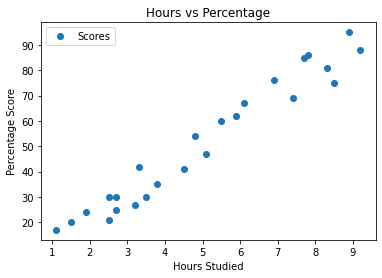

In [5]:
stud_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()

(array([4., 5., 1., 3., 1., 2., 2., 2., 3., 2.]),
 array([17. , 24.8, 32.6, 40.4, 48.2, 56. , 63.8, 71.6, 79.4, 87.2, 95. ]),
 <BarContainer object of 10 artists>)

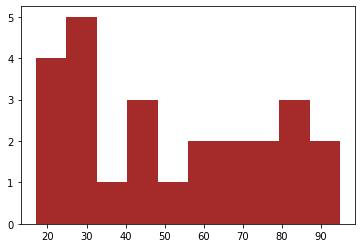

In [6]:
plt.hist(stud_data.Scores, color='brown')

(array([3., 4., 3., 1., 3., 2., 1., 2., 3., 3.]),
 array([1.1 , 1.91, 2.72, 3.53, 4.34, 5.15, 5.96, 6.77, 7.58, 8.39, 9.2 ]),
 <BarContainer object of 10 artists>)

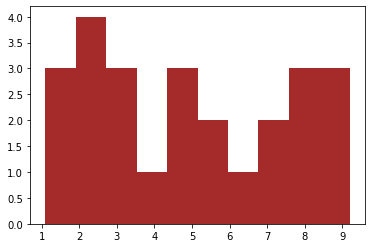

In [7]:
plt.hist(stud_data.Hours, color='brown')

{'whiskers': [<matplotlib.lines.Line2D at 0xd49eeb0>,
 'caps': [<matplotlib.lines.Line2D at 0xd4ac310>,
 'boxes': [<matplotlib.lines.Line2D at 0xd49ec90>],
 'medians': [<matplotlib.lines.Line2D at 0xd4ac770>],
 'fliers': [<matplotlib.lines.Line2D at 0xd4ac990>],
 'means': []}

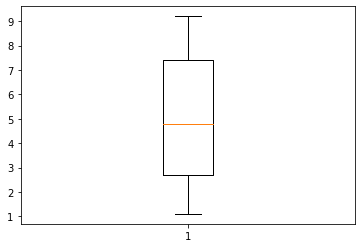

In [8]:
plt.boxplot(stud_data.Hours)

{'whiskers': [<matplotlib.lines.Line2D at 0xd4e7910>,
 'caps': [<matplotlib.lines.Line2D at 0xd4e7d50>,
 'boxes': [<matplotlib.lines.Line2D at 0xd4e76f0>],
 'medians': [<matplotlib.lines.Line2D at 0xd4f31d0>],
 'fliers': [<matplotlib.lines.Line2D at 0xd4f33f0>],
 'means': []}

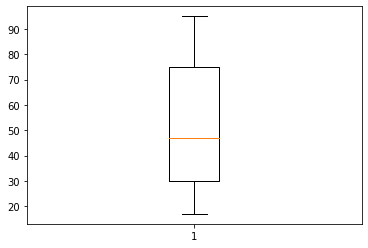

In [9]:
plt.boxplot(stud_data.Scores)

# Checking Correlation

In [18]:
stud_data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Preparing the data

In [10]:
X = stud_data.iloc[:, :-1].values  
y = stud_data.iloc[:, 1].values

In [11]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

# Training the data

In [12]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training is complete.")

Training is complete.


# Plotting the regression line and scatter diagram

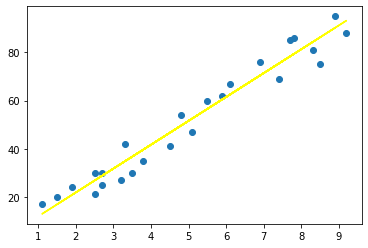

In [13]:
line = regressor.coef_*X+regressor.intercept_

plt.scatter(X, y)
plt.plot(X, line, color='yellow');
plt.show()

# Making Predictons

In [14]:
print(X_test)
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


# Comparing Actual vs Predicted

In [15]:
a_p = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
a_p

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


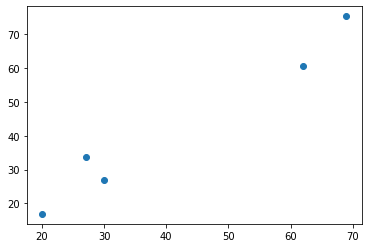

In [23]:
plt.scatter(a_p.Actual, a_p.Predicted)

# Testing with data

In [16]:
test_hours = np.array(9.25).reshape(-1,1)
prediction = regressor.predict(test_hours)
print("No of Hours = {}".format(test_hours))
print("Predicted Score = {}".format(prediction[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


# Evaluating the model

In [17]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.18385989900298
